# Exercise 9

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [ ]:
import h5py
import numpy as np

f = h5py.File("data.h5", "r")
X_train = np.array(f["X_train"])
y_train = np.array(f["y_train"])

X_val = np.array(f["X_val"])
y_val = np.array(f["y_val"])

X_test = np.array(f["X_test"])
y_test = np.array(f["y_test"])

f.close()

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import svm

classifier = svm.SVC()

model = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("classifier", classifier)
])

In [ ]:
model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics

y_pred = model.predict(X_val)

In [ ]:
import matplotlib.pyplot as plt

print(metrics.classification_report(y_val, y_pred))
confusion = metrics.confusion_matrix(y_val, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion)
disp.plot()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("test/quattro.png")

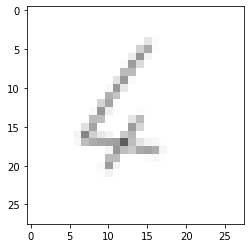

In [27]:
from PIL import Image
import matplotlib.cm as cm

img = Image.open("test/quattro.png")
img.thumbnail((28, 28))

plt.imshow(img)

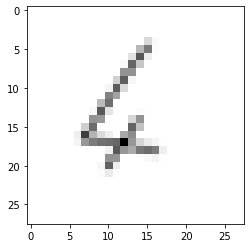

In [25]:
from PIL import ImageOps

gs_img = ImageOps.grayscale(img)
imgdata = np.array([255.0 - val for val in gs_img.getdata()]).reshape((28,28))
plt.imshow(imgdata, cmap=cm.binary)